### Data Dependent Metrics

#### First, we review some simple tricks to improve the baseline accuracy.


#### Second, we look at the Sharpness and SVD (Spectral) Transforms

#### Augmented Training Data


When you have the training data, the most obvious predictor of test performance is the training accuracy itself. 
Now for a very large production quality, pretrained model, the training data set can be enormous and you may not have access to it.  For this simple contest, however, the public_dats models are trained either on the computer vision (SV) public dat sets CIFAR10 and/or SVHN.

In these cases, the simplest way to imrpove the baseline predictor is to just augment the training data.
    

There are numerous standard and advanced techniques for augmenting a CV dataset.  And the standard deep learning frameworks, like Tensorflow and PyTorch, include many of these.  See, for example, the [Tensorflow Data-Augmentation documentation](https://www.tensorflow.org/tutorials/images/data_augmentation).

For example, below we show the ```estimate_accuracy()``` method, which simple performs

- Random flips
- Random rotations

Although there are numerous approaches, ranging from simple tweaks of the existing training data to automatrically generating adversial training examples.

In [1]:
import json
import numpy as np
import pandas as pd

import import_ipynb
import Utils as U

import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10,5

%load_ext watermark
%watermark

importing Jupyter notebook from Utils.ipynb


2021-05-25T22:48:16-07:00

CPython 3.8.5
IPython 7.18.1

compiler   : Clang 10.0.0 
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 12
interpreter: 64bit


In [2]:
def estimate_accuracy(model, dataset, num_iter):
    acc = 0.0
    for i in range(num_iter):
        x, y = dataset.next()
        pred = predict(x).numpy()
        acc += np.mean(pred == y)

        for i in range(4):

            augment = tf.keras.Sequential([
              layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
              layers.experimental.preprocessing.RandomRotation(np.random.random()),
            ])

        x = augment(x,training=True)

        pred = predict(x).numpy()
        acc += np.mean(pred == y)


    return acc / (5*num_iter)


#### Re-use baseline accuracies computed in Notebook1

#### Augmented results tabluated from our Google Colab calculations


#### Below, sometimes we use either
    - baselines_results
    - baselines

In [3]:
with open('baseline_results.json') as f:
     baseline_results = json.load(f)
baseline_results

{'task1_v4': {'0xx: ': {'R2': 0.014292535089860836,
   'Ktau': -0.10097427492091338,
   'RMSE': 0.021460230031369164},
  '1xx: ': {'R2': 0.11554853882277372,
   'Ktau': -0.32566947363946475,
   'RMSE': 0.021158003539459964},
  '2xx: ': {'R2': 0.21804129105288328,
   'Ktau': -0.5427824560657746,
   'RMSE': 0.01767472579502584},
  '5xx: ': {'R2': 0.006471467874472725,
   'Ktau': -0.008439494725697222,
   'RMSE': 0.04255461706481206},
  '6xx: ': {'R2': 0.1592159231479705,
   'Ktau': -0.3068826024572417,
   'RMSE': 0.05008353175525126},
  '7xx: ': {'R2': 0.7802150401325242,
   'Ktau': -0.5954371961386479,
   'RMSE': 0.02239060084848064}},
 'task2_v1': {'2xx: ': {'R2': 0.2423906965466711,
   'Ktau': -0.25490196078431376,
   'RMSE': 0.02373354556128289},
  '6xx: ': {'R2': 0.02385357073113048,
   'Ktau': 0.04605362824893069,
   'RMSE': 0.018863462505398245},
  '9xx: ': {'R2': 0.8288123823145608,
   'Ktau': -0.7333333333333333,
   'RMSE': 0.011419199147995053},
  '10xx: ': {'R2': 0.01612029857

##### Only keep Kendtal-tau for this analysis

In [4]:
baselines = {}
for task in ['task1_v4','task2_v1']:
    baselines[task]={}
    for mid in baseline_results[task].keys():
        baselines[task][mid.replace(': ','')]=baseline_results[task][mid]['Ktau']
baselines

{'task1_v4': {'0xx': -0.10097427492091338,
  '1xx': -0.32566947363946475,
  '2xx': -0.5427824560657746,
  '5xx': -0.008439494725697222,
  '6xx': -0.3068826024572417,
  '7xx': -0.5954371961386479},
 'task2_v1': {'2xx': -0.25490196078431376,
  '6xx': 0.04605362824893069,
  '9xx': -0.7333333333333333,
  '10xx': -0.015267620413811482}}

In [5]:

augmented={}
augmented['task1_v4']={'0xx': -0.0907, '1xx':  -0.485,'2xx':  -0.182,'5xx':  0.233,'6xx':  0.0737, '7xx':  -0.303 }
augmented['task2_v1']={'2xx':  0.83 , '6xx': 0.6, '9xx': 0.359 , '10xx':0.69}

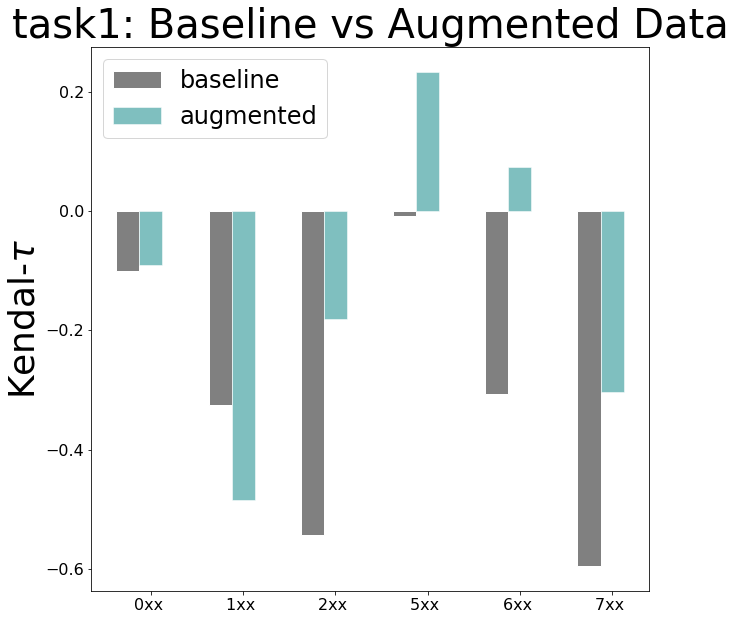

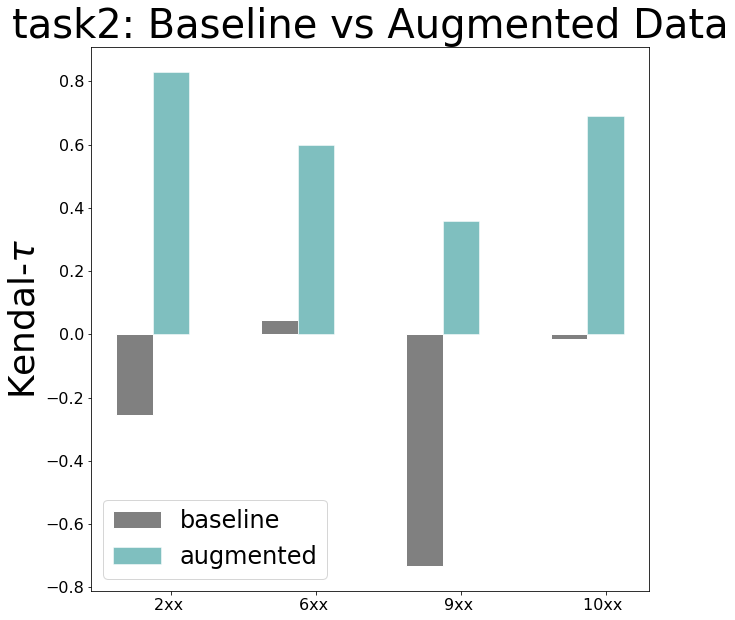

In [6]:
title = "Comparison of Baseline to Augmented Data \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric"    
title = "{}: Baseline vs Augmented Data"    

shape=[1,2]
rcParams['figure.figsize'] = 10,10
rcParams.update({'font.size': 16})
barWidth = 0.25


for task in ["task1_v4", "task2_v1"]:
      
    model_grps = [k.replace(":","") for k in baseline_results[task].keys()]
    baseline_Ktau = [v['Ktau'] for v in baseline_results[task].values()]
    
    bars = model_grps
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, baseline_Ktau, label='baseline', color='grey',width=barWidth, edgecolor='white')
    plt.bar(r2, augmented[task].values(), label='augmented', alpha=0.5, color='teal',width=barWidth, edgecolor='white')
    plt.xticks([r + barWidth for r in range(len(bars))], bars)

    plt.legend(prop={'size': U.LEGEND_SIZE})
    plt.ylabel(r"Kendal-$\tau$", fontsize=U.AXIS_SIZE)
    taskname = U.taskname(task)
    plt.title(title.format(taskname),  fontsize=U.TITLE_SIZE)

    plt.savefig("{}/augmented_{}.png".format(U.IMG_DIR, taskname))
    plt.show()

Why does this happen ?  Recall that the **task1_v4** models are essentially simply stacked linear models, whereas the **task2_v2** models resemble the traditional VGG-like architecture and include several Convolutional2D (Conv2D) layers at the start of the network.  The Conv2D layers help represent translational and rotational invariances common in Computer Vision (CV) data, so when we added fliiped and rotated training images, the task2 models predict their labels mostly correctly. In contrast, the overly simplistic task1 models perform poorly for complex (CV) tasks.

This is also suggests that the **task2_v2** models have simply not been trained very well, and that these kind of stamdard data augmentations would be included in any production quality model, and the models would actually be trained with this data. 

It doesn't make sense to us to spend time trying to win the contest by simply looking for new data augmentation schemes.  Indeed, this simple augmentation strategy brought the contest causality metric up from the basline $7-8$ to $18.xx$, which is non-sensical to us.  We belive the contest could be readily hacked by simply augmenting the training data, and this tells us nothing about generalization.  




### Data-Dependent Complexity Metrics 

Several data-dependent metrics, such as the Sharpness, which essentially revaluate the training accuracy after smoothing the weight matrices.  We also argue that it is non-sensical to evaluate data-dependent complexity metrics, such as the Sharpness metric, without comparing them to the baseline training accuracy.   We do that here now.


#### Sharpness

The contest includes a Shaprness baseline, described in the paper [Fantastic Measures of Generalization and where to find them](https://arxiv.org/abs/1912.02178)

This method essentially:

- smoothes the weight matrices, by clipping large and small values
- run a 1-3 iterations of Backprop, and repeats the smoothing
- evaluates the training accuracy as a predictor

The first thing we did is compare the Sharpness baseline to our training accuracy baseline using the contest metric--and the results were informative.  

NOTE:  These results need to be re-compiled

- Sharpness baseline
```
======= Set 1 (Task2_v1): mutual_information_v2(task_task2_v1_score)=0.103782771584 =======
======= Set 2 (Task1_v4): mutual_information_v2(task_task1_v4_score)=0.005493230773 =======
Task average: 5.463800117850
```

- Training Accuracy baseline
```
======= Set 1 (Task2_v1): mutual_information_v2(task_task2_v1_score)=0.071868229422 =======
======= Set 2 (Task1_v4): mutual_information_v2(task_task1_v4_score)=0.080814007337 =======
Task average: 7.634111837957
```

In contrast, the Kendal-tau $(\tau)$ rank correlation metric peformed significanly better for the shapness over the training accuracy baseline for all model groups except task1_v4, 2xx, and these are close.



In [7]:
baselines[task]

{'2xx': -0.25490196078431376,
 '6xx': 0.04605362824893069,
 '9xx': -0.7333333333333333,
 '10xx': -0.015267620413811482}

In [8]:
sharpness = {}
for task in ['task1_v4','task2_v1']:
    filename = "sharpness_vs_accs_{}_results.csv".format(task)
    df = pd.read_csv(filename, index_col='model')
    sharpness[task] = df.to_dict()['Ktau']
    
sharpness

{'task1_v4': {'0xx': 0.7223242385974246,
  '1xx': 0.8219277191853159,
  '2xx': 0.4848484848484848,
  '5xx': 0.7615129419677079,
  '6xx': 0.755361893575515,
  '7xx': 0.6363636363636362},
 'task2_v1': {'2xx': 0.7475450015964021,
  '6xx': 0.3934447376823169,
  '9xx': 0.7333333333333333,
  '10xx': 0.6770032003863299}}

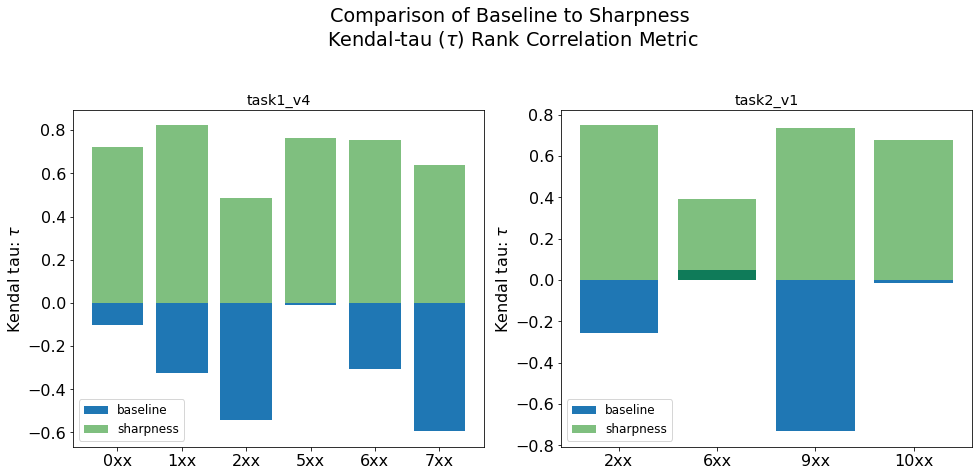

In [9]:
title = "Comparison of Baseline to Sharpness \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric"    
    
shape=[1,2]
rcParams['figure.figsize'] = 7*shape[1],7*shape[0]
rcParams.update({'font.size': 16})

fig, axes = plt.subplots(shape[0], shape[1])
subplts = axes.flatten()[::-1].tolist()
fig.suptitle(title)
fig.tight_layout(pad=2.0)
rcParams.update({'font.size': 12})


for task in ["task1_v4", "task2_v1"]:
    subplt = subplts.pop()
      
    subplt.bar(baselines[task].keys(),baselines[task].values(), label='baseline')
    subplt.bar(sharpness[task].keys(),sharpness[task].values(), label=r"sharpness", alpha=0.5, color='green')

    subplt.legend()
    subplt.set_ylabel(r"Kendal tau: $\tau$");
    subplt.set_title(task)

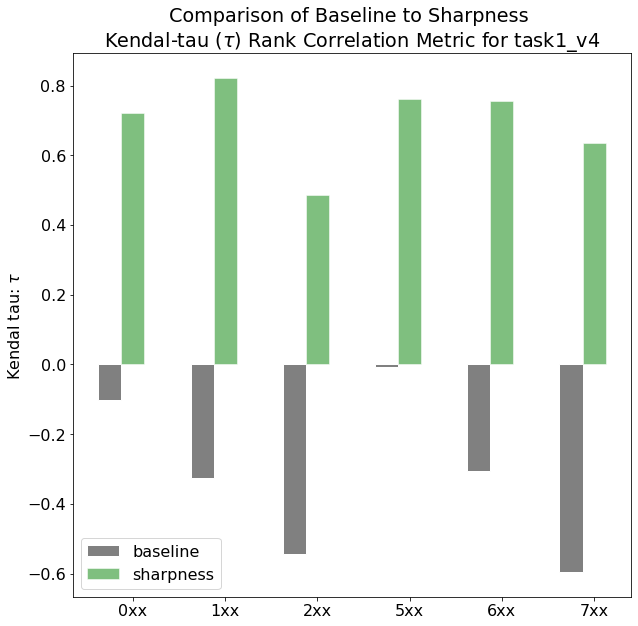

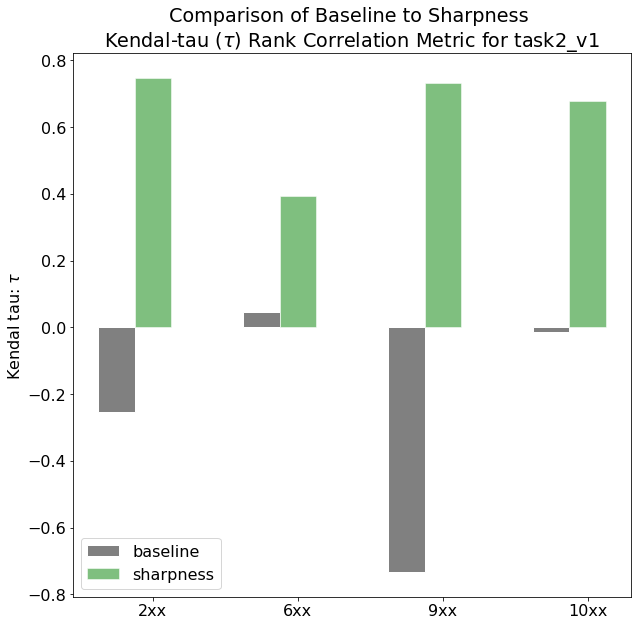

In [10]:
title = "Comparison of Baseline to Sharpness \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric for {}"    
    
rcParams['figure.figsize'] = 10,10
rcParams.update({'font.size': 16})

barWidth = 0.25

for task in ["task1_v4", "task2_v1"]:
    #subplt = subplts.pop()
    taskname = U.taskname(task)

    bars = baselines[task].keys()
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, baselines[task].values(), label='baseline', color='grey',width=barWidth, edgecolor='white')
    plt.bar(r2,sharpness[task].values(), label=r"sharpness", alpha=0.5, color='green',width=barWidth, edgecolor='white')
    plt.xticks([r + barWidth for r in range(len(bars))], bars)

    plt.legend()
    plt.ylabel(r"Kendal tau: $\tau$");
    plt.title(title.format(task))
    plt.savefig("{}/Sharpness_{}.png".format(U.IMG_DIR,taskname))
    plt.show()

#### SVD (Spectral) Smoothing

Using the weightwatcher theory, the theory of Heavy Tailed Self-Regularization (HT-SR), we can also design a data-dependent metric, similar to the Sharpness metric, that also smooths the layer weight matrices $\mathbf{W}$.  

If we form the Singular Value Decomposition (SVD) of the layer weight matrices, we know that the largest singular vectors should conttain the dominant contributions to the model.  They are more localized, have lower entropy, and their associated eigenvalues form a Power Law tail.  To that end, we can smooth the layer weight matrices $\mathbf{W}$ by forming the SVD, keeping only the singular vectors in the Power Law tail, and then computing the training accuracy.

We call this *SVD Smoothing*.  Here, we provide results for 2 cases:

- SVD10:  keep the largest 10% of the Singular Vectors of each $\mathbf{W}$

- SVD20:  keep the largest 20% of the Singular Vectors of each $\mathbf{W}$

Below we compare the Kendal-tau $(\tau)$ rank correlation metric for each model group for the baseline, SVD10, and SVD20 approaches.  Both SVD smoothing methods outperfom the training accuracy baseline, with the SVD20 model outperforming SVD10 for all model groups except the task1_v4 0xx case, and these are still pretty close.  Generally speaking the *SVD Smoothing* method performs well, and does not require any iterations of Backprop.


### Repeat with Actual results

- baselines from notebook
- augmented from ?


In [11]:
svd10 = {}
for task in ['task1_v4','task2_v1']:
    filename = "svd10_vs_accs_{}_results.csv".format(task)
    df = pd.read_csv(filename, index_col='model')
    svd10[task] = df.to_dict()['Ktau']
 
print('svd10')
print(svd10)

svd20 = {}
for task in ['task1_v4','task2_v1']:
    filename = "svd20_vs_accs_{}_results.csv".format(task)
    df = pd.read_csv(filename, index_col='model')
    svd20[task] = df.to_dict()['Ktau']
    
print('\nsvd20')
print(svd20)

svd10
{'task1_v4': {'0xx': 0.6109090909090907, '1xx': 0.7878787878787877, '2xx': 0.7575757575757575, '5xx': 0.43333333333333335, '6xx': 0.4526315789473685, '7xx': 0.6666666666666666}, 'task2_v1': {'2xx': 0.8300653594771243, '6xx': 0.16339869281045755, '9xx': 0.4666666666666666, '10xx': 0.6666666666666666}}

svd20
{'task1_v4': {'0xx': 0.5255509453933046, '1xx': 0.8702543635872545, '2xx': 0.8181818181818181, '5xx': 0.6166666666666666, '6xx': 0.6210526315789474, '7xx': 0.7272727272727272}, 'task2_v1': {'2xx': 0.8300653594771243, '6xx': 0.2679738562091504, '9xx': 0.8666666666666666, '10xx': 0.7272727272727272}}


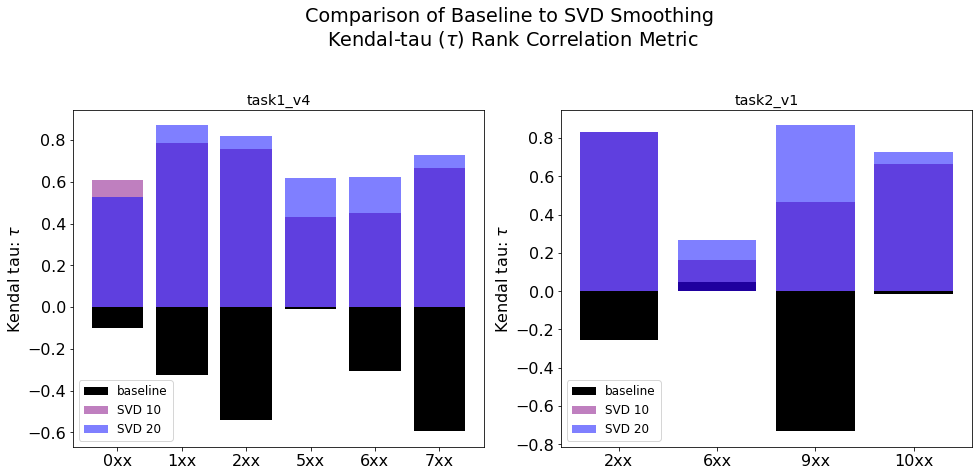

In [12]:
title = "Comparison of Baseline to SVD Smoothing \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric"    
    
shape=[1,2]
rcParams['figure.figsize'] = 7*shape[1],7*shape[0]
rcParams.update({'font.size': 16})

fig, axes = plt.subplots(shape[0], shape[1])
subplts = axes.flatten()[::-1].tolist()
fig.suptitle(title)
fig.tight_layout(pad=2.0)
rcParams.update({'font.size': 12})


for task in ["task1_v4", "task2_v1"]:
    subplt = subplts.pop()
      
    subplt.bar(baselines[task].keys(),baselines[task].values(), label='baseline', color='black')
    subplt.bar(svd10[task].keys(),svd10[task].values(), label=r"SVD 10", alpha=0.5, color='purple')
    subplt.bar(svd20[task].keys(),svd20[task].values(), label=r"SVD 20", alpha=0.5, color='blue')

    subplt.legend()
    subplt.set_ylabel(r"Kendal tau: $\tau$");
    subplt.set_title(task)

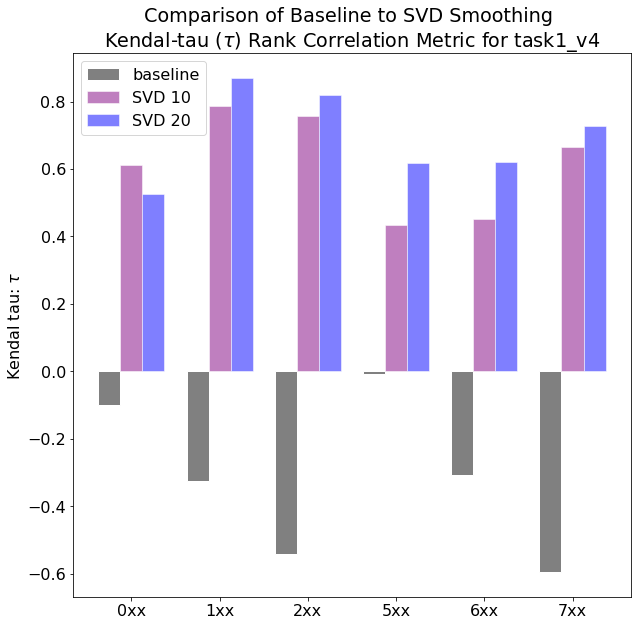

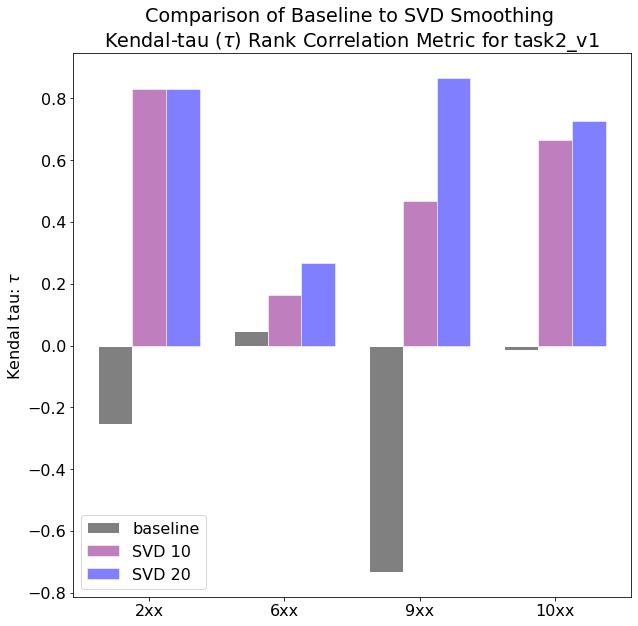

In [13]:
rcParams['figure.figsize'] = 10,10
rcParams.update({'font.size': 16})

barWidth = 0.25

title = "Comparison of Baseline to SVD Smoothing \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric for {}"    


for task in ["task1_v4", "task2_v1"]:
    #subplt = subplts.pop()
    taskname = U.taskname(task)


    bars = baselines[task].keys()
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, baselines[task].values(), label='baseline', color='grey',width=barWidth, edgecolor='white')
    plt.bar(r2,svd10[task].values(), label=r"SVD 10", alpha=0.5, color='purple',width=barWidth, edgecolor='white')
    plt.bar(r3,svd20[task].values(), label=r"SVD 20", alpha=0.5, color='blue',width=barWidth, edgecolor='white')
    plt.xticks([r + barWidth for r in range(len(bars))], bars)

    plt.legend()
    plt.ylabel(r"Kendal tau: $\tau$");
    plt.title(title.format(task))
    plt.savefig("{}/SVDSmoothing_{}.png".format(U.IMG_DIR,taskname))
    plt.show()

We next compare the SVD Smoothing method SVD20 to the Sharpness method provided.  Here, the methods appear competitive, with the SVD20 outperforming the Sharpness on 6 out of 10 of th model groups. 

Notice: we have made no attempt to optimize the singular vectors selected by the SVD Smoothing, nor have we attempted improve the method by running Backprop.  The SVD Smoothing approach works reasonably well, and we hope it will be useful to practioners.

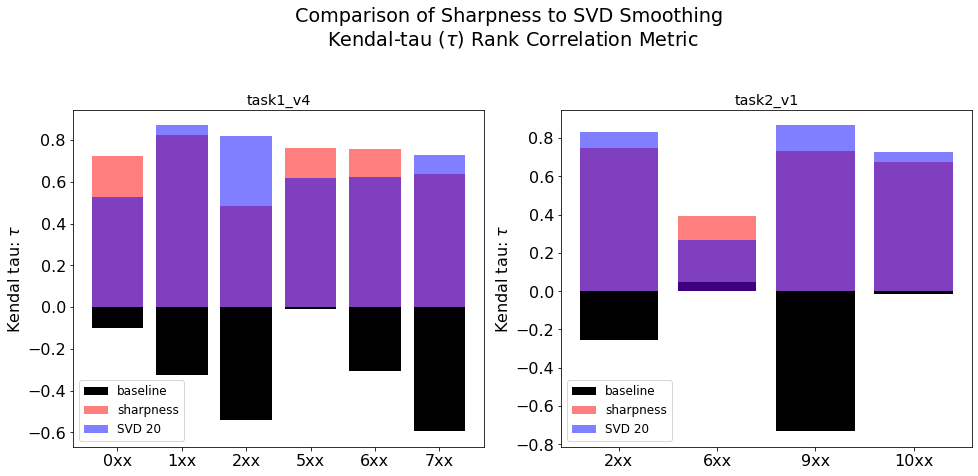

In [14]:
title = "Comparison of Sharpness to SVD Smoothing \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric"    
    
shape=[1,2]
rcParams['figure.figsize'] = 7*shape[1],7*shape[0]
rcParams.update({'font.size': 16})

fig, axes = plt.subplots(shape[0], shape[1])
subplts = axes.flatten()[::-1].tolist()
fig.suptitle(title)
fig.tight_layout(pad=2.0)
rcParams.update({'font.size': 12})


for task in ["task1_v4", "task2_v1"]:
    subplt = subplts.pop()

    subplt.bar(baselines[task].keys(),[v for v in baselines[task].values()], label='baseline', color='black')
    subplt.bar(sharpness[task].keys(),sharpness[task].values(), label=r"sharpness", alpha=0.5, color='red')
    subplt.bar(svd20[task].keys(),svd20[task].values(), label=r"SVD 20", alpha=0.5, color='blue')

    subplt.legend()
    subplt.set_ylabel(r"Kendal tau: $\tau$");
    subplt.set_title(task)

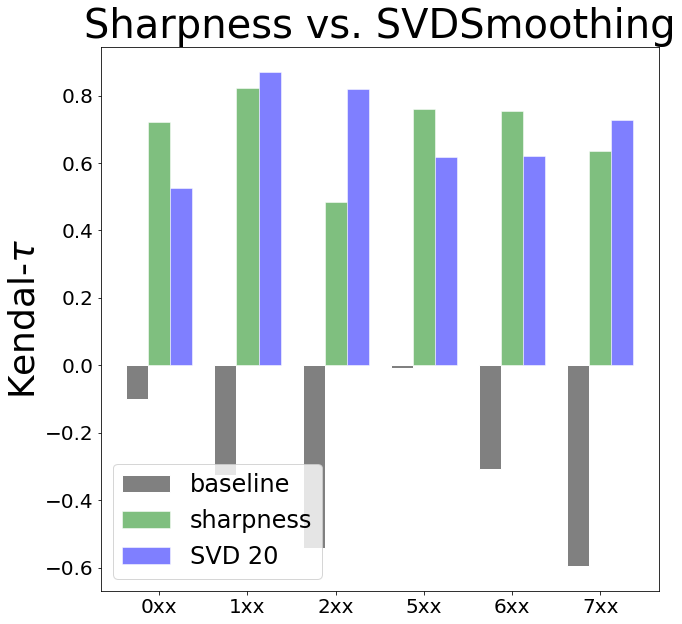

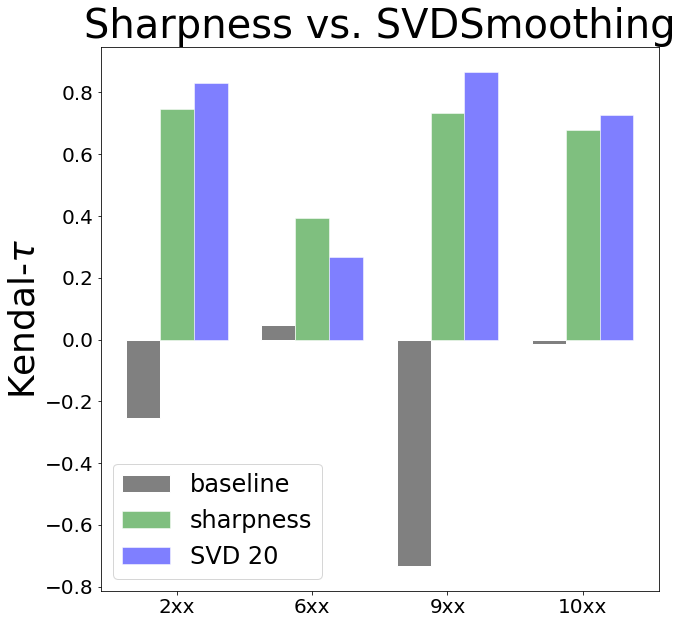

In [15]:
title = "Comparison of Sharpness to SVD Smoothing \n"+ r"Kendal-tau $(\tau)$ Rank Correlation Metric for {}"    
title = "Sharpness vs. SVDSmoothing"    

    
rcParams['figure.figsize'] = 10,10
rcParams.update({'font.size': 16})

barWidth = 0.25

for task in ["task1_v4", "task2_v1"]:
    #subplt = subplts.pop()
    taskname = U.taskname(task)

    bars = baselines[task].keys()
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, baselines[task].values(), label='baseline', color='grey',width=barWidth, edgecolor='white')
    plt.bar(r2,sharpness[task].values(), label=r"sharpness", alpha=0.5, color='green',width=barWidth, edgecolor='white')
    plt.bar(r3,svd20[task].values(), label=r"SVD 20", alpha=0.5, color='blue',width=barWidth, edgecolor='white')
    
    plt.xticks([r + barWidth for r in range(len(bars))], bars)
    plt.tick_params(axis='both', which='major', labelsize=U.TICK_SIZE)

    plt.legend(prop={'size': U.LEGEND_SIZE})
    plt.ylabel(r"Kendal-$\tau$", fontsize=U.AXIS_SIZE);
    plt.title(title.format(taskname), fontsize=U.TITLE_SIZE)
        
    plt.savefig("{}/SharpSVD_{}.png".format(U.IMG_DIR,taskname))
    plt.show()